In [48]:
import pandas as pd
import numpy as np
import seaborn as sns

In [49]:
df=pd.read_csv('spam.csv', encoding='latin')

In [50]:
df.shape

(5572, 5)

In [51]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1026,ham,Yes da. Any plm at ur office,NaN,NaN,NaN
4628,ham,Only saturday and sunday holiday so its very d...,NaN,NaN,NaN
1870,ham,"Aight, I'll text you when I'm back",NaN,NaN,NaN
4588,ham,Have you not finished work yet or something?,NaN,NaN,NaN
2002,spam,TheMob>Yo yo yo-Here comes a new selection of ...,NaN,NaN,NaN


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [53]:
df=df[['v1','v2']]

In [54]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [55]:
# Renaming colulmns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [56]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [58]:
#encoding target
df['target']=lb.fit_transform(df['target'])

In [59]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [60]:
# checking missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [61]:
#checking Duplicate values
df.duplicated().sum()

403

In [62]:
#droping duplicated values
df=df.drop_duplicates(keep='first')

In [63]:
df.duplicated().sum()

0

## EDA


In [64]:
df['target'].value_counts().index

Int64Index([0, 1], dtype='int64')

In [65]:
count=df['target'].value_counts().values

In [66]:
import matplotlib.pyplot as plt

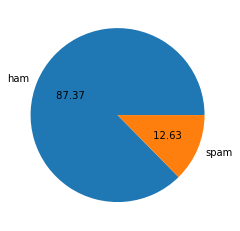

In [67]:
plt.pie(x=count,labels=['ham','spam'],autopct="% 0.2f")
plt.show()

In [68]:
# Data is imbalanced

In [69]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [70]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [71]:
df['number of charecter']=df['text'].apply(len)

C:\Users\User\AppData\Local\Temp\ipykernel_13456\1674426910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number of charecter']=df['text'].apply(len)


In [72]:
df['number of words']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

C:\Users\User\AppData\Local\Temp\ipykernel_13456\3871588750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number of words']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)))


In [73]:
df['number of sentences']=df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

C:\Users\User\AppData\Local\Temp\ipykernel_13456\2627619913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number of sentences']=df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))


In [74]:
df.describe()

,target,number of charecter,number of words,number of sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [75]:
df.columns

Index(['target', 'text', 'number of charecter', 'number of words',
       'number of sentences'],
      dtype='object')

In [76]:
df[['number of charecter', 'number of words', 'number of sentences']].describe()

,number of charecter,number of words,number of sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [77]:
# ham mails
df[df['target']==0][['number of charecter', 'number of words', 'number of sentences']].describe()

,number of charecter,number of words,number of sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [78]:
#spam mail
df[df['target']==1][['number of charecter', 'number of words', 'number of sentences']].describe()

,number of charecter,number of words,number of sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='number of charecter', ylabel='Count'>

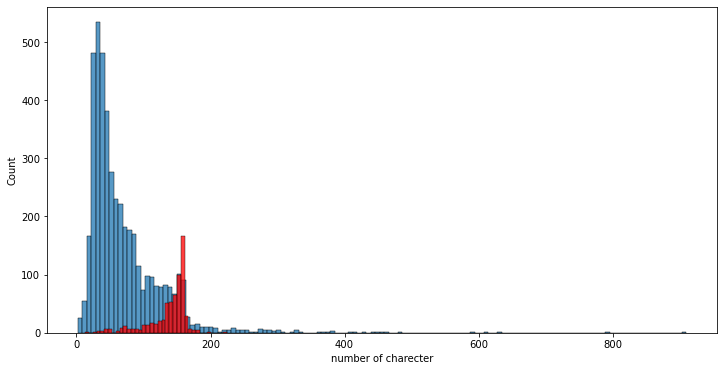

In [79]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['number of charecter'])
sns.histplot(df[df['target'] == 1]['number of charecter'],color='red')

<AxesSubplot:xlabel='number of words', ylabel='Count'>

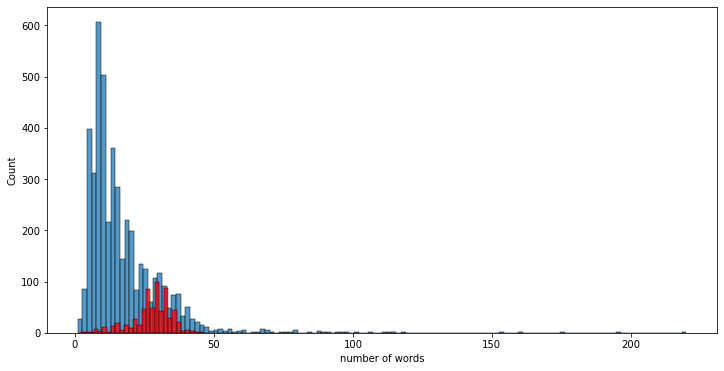

In [80]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['number of words'])
sns.histplot(df[df['target'] == 1]['number of words'],color='red')

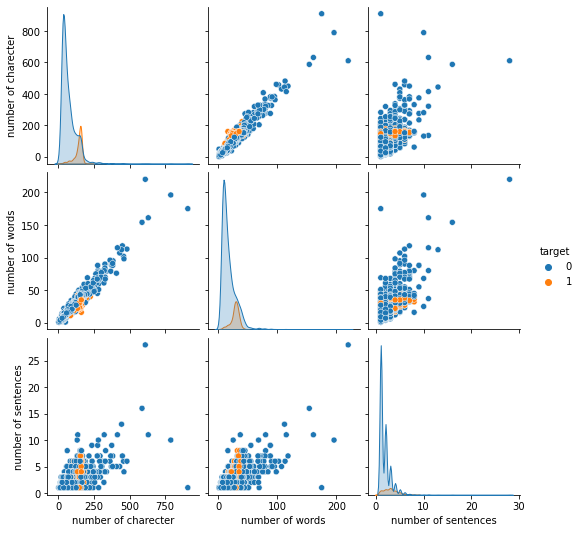

In [81]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

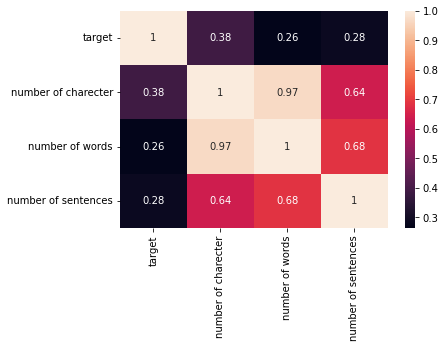

In [82]:
sns.heatmap(df.corr(),annot=True)

## data preprocessing

In [83]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [84]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [85]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [86]:
 df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\User\AppData\Local\Temp\ipykernel_13456\3580470273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [87]:
df.head()

,target,text,number of charecter,number of words,number of sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [88]:

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [168]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

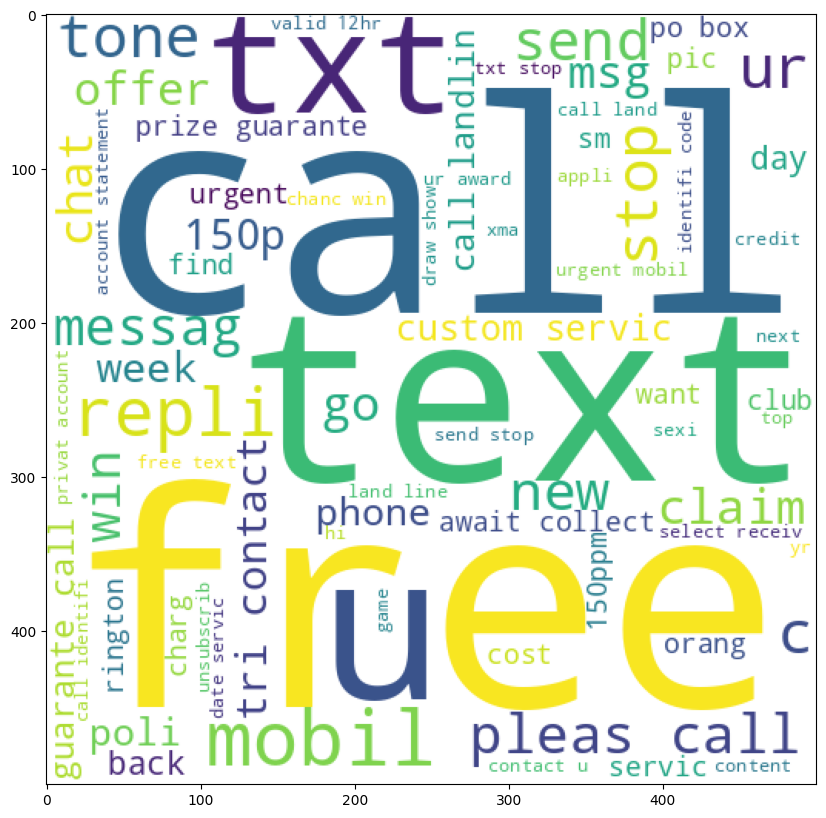

In [169]:
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)

In [170]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

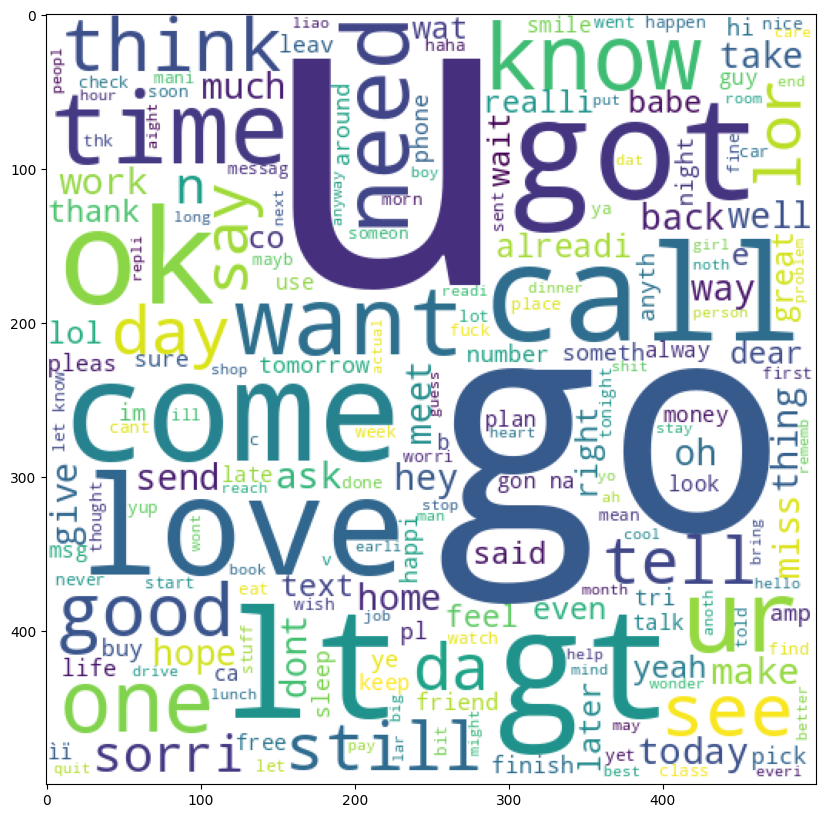

In [171]:
plt.figure(figsize=(10,10))
plt.imshow(ham_wc)

In [89]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)




In [90]:
len(spam_corpus)

9939

In [91]:
from collections import Counter


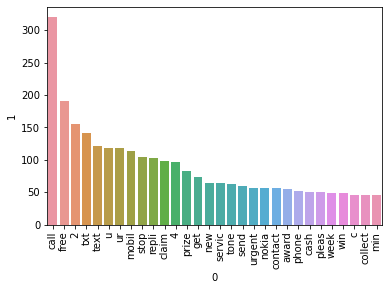

In [92]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [93]:
temp_df=pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['word', 'count'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

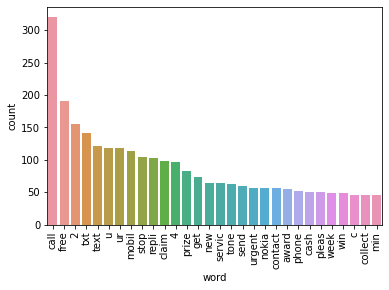

In [94]:
sns.barplot(x='word', y='count', data=temp_df)
plt.xticks(rotation='vertical')

In [95]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

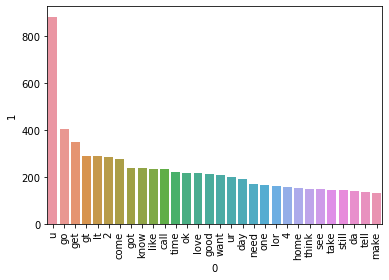

In [96]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [115]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [125]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [ ]:
Y=df['target']

In [126]:
train_X,test_X,train_Y,test_Y=train_test_split(x,y,test_size=0.2,random_state=42)

In [128]:
gnb.fit(train_X,train_Y)
y_pred1 = gnb.predict(test_X)
print(accuracy_score(test_Y,y_pred1))
print(confusion_matrix(test_Y,y_pred1))
print(precision_score(test_Y,y_pred1))

0.8607350096711799
[[769 120]
 [ 24 121]]
0.5020746887966805


In [127]:
mnb.fit(train_X,train_Y)
y_pred2 = gnb.predict(test_X)
print(accuracy_score(test_Y,y_pred2))
print(confusion_matrix(test_Y,y_pred2))
print(precision_score(test_Y,y_pred2))

0.9032882011605415
[[795  94]
 [  6 139]]
0.5965665236051502


In [129]:
bnb.fit(train_X,train_Y)
y_pred3 = gnb.predict(test_X)
print(accuracy_score(test_Y,y_pred3))
print(confusion_matrix(test_Y,y_pred3))
print(precision_score(test_Y,y_pred3))

0.8607350096711799
[[769 120]
 [ 24 121]]
0.5020746887966805


In [116]:

x = tfidf.fit_transform(df['transformed_text']).toarray()

In [117]:
y=df['target']

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [120]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [121]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [122]:
gnb.fit(train_x,train_y)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [123]:

mnb.fit(train_x,train_y)
y_pred2 = mnb.predict(test_x)
print(accuracy_score(test_y,y_pred2))
print(confusion_matrix(test_y,y_pred2))
print(precision_score(test_y,y_pred2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [124]:
bnb.fit(train_x,train_y)
y_pred3= bnb.predict(test_x)
print(accuracy_score(test_y,y_pred3))
print(confusion_matrix(test_y,y_pred3))
print(precision_score(test_y,y_pred3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [130]:
import pickle

In [131]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))